## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  18.540227  1659.494840  0.615231  1.231821  1.533328
1  93.896304  1519.551282  0.952232  7.629646  1.406237
2  65.423343   600.906480  0.880911  2.651623  1.444810
3  62.197823   276.457681  0.624077  6.720113  1.113980
4  30.075341   475.691478  0.304051  7.871660  1.263884


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0042963	total: 67.7ms	remaining: 1m 7s
1:	learn: 0.9928228	total: 68.3ms	remaining: 34.1s
2:	learn: 0.9808233	total: 69ms	remaining: 22.9s
3:	learn: 0.9692508	total: 69.7ms	remaining: 17.3s
4:	learn: 0.9574404	total: 70.3ms	remaining: 14s
5:	learn: 0.9461071	total: 70.8ms	remaining: 11.7s
6:	learn: 0.9328460	total: 71.2ms	remaining: 10.1s
7:	learn: 0.9192507	total: 71.6ms	remaining: 8.88s
8:	learn: 0.9066720	total: 72ms	remaining: 7.93s
9:	learn: 0.8970362	total: 72.6ms	remaining: 7.18s
10:	learn: 0.8865687	total: 73.1ms	remaining: 6.58s
11:	learn: 0.8768300	total: 73.7ms	remaining: 6.07s
12:	learn: 0.8676113	total: 74.3ms	remaining: 5.64s
13:	learn: 0.8561423	total: 74.8ms	remaining: 5.26s
14:	learn: 0.8468278	total: 75.2ms	remaining: 4.94s
15:	learn: 0.8364833	total: 75.6ms	remaining: 4.65s
16:	learn: 0.8271991	total: 76ms	remaining: 4.4s
17:	learn: 0.8196638	total: 76.5ms	remaining: 4.17s
18:	learn: 0.8118640	total: 77ms	remaining: 3.98s
19:

92:	learn: 0.3965026	total: 109ms	remaining: 1.06s
93:	learn: 0.3932196	total: 109ms	remaining: 1.05s
94:	learn: 0.3897226	total: 110ms	remaining: 1.04s
95:	learn: 0.3869621	total: 110ms	remaining: 1.03s
96:	learn: 0.3840677	total: 110ms	remaining: 1.03s
97:	learn: 0.3814589	total: 111ms	remaining: 1.02s
98:	learn: 0.3782891	total: 111ms	remaining: 1.01s
99:	learn: 0.3747922	total: 111ms	remaining: 1s
100:	learn: 0.3718182	total: 112ms	remaining: 995ms
101:	learn: 0.3688371	total: 112ms	remaining: 987ms
102:	learn: 0.3662467	total: 113ms	remaining: 981ms
103:	learn: 0.3640972	total: 113ms	remaining: 975ms
104:	learn: 0.3611761	total: 114ms	remaining: 969ms
105:	learn: 0.3584579	total: 114ms	remaining: 963ms
106:	learn: 0.3564387	total: 115ms	remaining: 957ms
107:	learn: 0.3538382	total: 115ms	remaining: 951ms
108:	learn: 0.3515544	total: 115ms	remaining: 943ms
109:	learn: 0.3489078	total: 116ms	remaining: 937ms
110:	learn: 0.3462921	total: 116ms	remaining: 931ms
111:	learn: 0.3437348	t

266:	learn: 0.1638135	total: 186ms	remaining: 511ms
267:	learn: 0.1631876	total: 187ms	remaining: 510ms
268:	learn: 0.1628257	total: 187ms	remaining: 509ms
269:	learn: 0.1623766	total: 188ms	remaining: 507ms
270:	learn: 0.1616331	total: 188ms	remaining: 506ms
271:	learn: 0.1611167	total: 189ms	remaining: 505ms
272:	learn: 0.1604704	total: 190ms	remaining: 505ms
273:	learn: 0.1599069	total: 190ms	remaining: 504ms
274:	learn: 0.1594368	total: 191ms	remaining: 503ms
275:	learn: 0.1586812	total: 191ms	remaining: 501ms
276:	learn: 0.1580626	total: 192ms	remaining: 500ms
277:	learn: 0.1574207	total: 192ms	remaining: 499ms
278:	learn: 0.1569193	total: 192ms	remaining: 497ms
279:	learn: 0.1561862	total: 193ms	remaining: 496ms
280:	learn: 0.1553811	total: 193ms	remaining: 495ms
281:	learn: 0.1547525	total: 194ms	remaining: 494ms
282:	learn: 0.1542730	total: 194ms	remaining: 492ms
283:	learn: 0.1536981	total: 195ms	remaining: 491ms
284:	learn: 0.1531174	total: 195ms	remaining: 489ms
285:	learn: 

505:	learn: 0.0834947	total: 290ms	remaining: 284ms
506:	learn: 0.0834025	total: 291ms	remaining: 283ms
507:	learn: 0.0832366	total: 291ms	remaining: 282ms
508:	learn: 0.0830524	total: 292ms	remaining: 281ms
509:	learn: 0.0828042	total: 292ms	remaining: 281ms
510:	learn: 0.0827140	total: 292ms	remaining: 280ms
511:	learn: 0.0824351	total: 293ms	remaining: 279ms
512:	learn: 0.0822739	total: 293ms	remaining: 278ms
513:	learn: 0.0820560	total: 294ms	remaining: 278ms
514:	learn: 0.0818188	total: 294ms	remaining: 277ms
515:	learn: 0.0816615	total: 294ms	remaining: 276ms
516:	learn: 0.0814319	total: 295ms	remaining: 275ms
517:	learn: 0.0812086	total: 295ms	remaining: 275ms
518:	learn: 0.0810567	total: 295ms	remaining: 274ms
519:	learn: 0.0808216	total: 296ms	remaining: 273ms
520:	learn: 0.0807336	total: 296ms	remaining: 272ms
521:	learn: 0.0805216	total: 297ms	remaining: 272ms
522:	learn: 0.0803719	total: 297ms	remaining: 271ms
523:	learn: 0.0802384	total: 297ms	remaining: 270ms
524:	learn: 

683:	learn: 0.0540796	total: 368ms	remaining: 170ms
684:	learn: 0.0538802	total: 369ms	remaining: 170ms
685:	learn: 0.0537666	total: 369ms	remaining: 169ms
686:	learn: 0.0536505	total: 370ms	remaining: 168ms
687:	learn: 0.0535494	total: 370ms	remaining: 168ms
688:	learn: 0.0534328	total: 370ms	remaining: 167ms
689:	learn: 0.0533191	total: 371ms	remaining: 167ms
690:	learn: 0.0531696	total: 371ms	remaining: 166ms
691:	learn: 0.0530601	total: 371ms	remaining: 165ms
692:	learn: 0.0529485	total: 372ms	remaining: 165ms
693:	learn: 0.0528335	total: 372ms	remaining: 164ms
694:	learn: 0.0527235	total: 373ms	remaining: 164ms
695:	learn: 0.0526099	total: 373ms	remaining: 163ms
696:	learn: 0.0525014	total: 374ms	remaining: 162ms
697:	learn: 0.0523947	total: 374ms	remaining: 162ms
698:	learn: 0.0522823	total: 374ms	remaining: 161ms
699:	learn: 0.0521771	total: 375ms	remaining: 161ms
700:	learn: 0.0520661	total: 375ms	remaining: 160ms
701:	learn: 0.0519623	total: 376ms	remaining: 159ms
702:	learn: 

923:	learn: 0.0330125	total: 473ms	remaining: 38.9ms
924:	learn: 0.0329619	total: 473ms	remaining: 38.4ms
925:	learn: 0.0328877	total: 474ms	remaining: 37.9ms
926:	learn: 0.0328512	total: 474ms	remaining: 37.3ms
927:	learn: 0.0327479	total: 475ms	remaining: 36.8ms
928:	learn: 0.0326637	total: 475ms	remaining: 36.3ms
929:	learn: 0.0325388	total: 475ms	remaining: 35.8ms
930:	learn: 0.0324991	total: 476ms	remaining: 35.3ms
931:	learn: 0.0324169	total: 476ms	remaining: 34.7ms
932:	learn: 0.0323814	total: 477ms	remaining: 34.2ms
933:	learn: 0.0323113	total: 477ms	remaining: 33.7ms
934:	learn: 0.0322763	total: 477ms	remaining: 33.2ms
935:	learn: 0.0322177	total: 478ms	remaining: 32.7ms
936:	learn: 0.0321688	total: 478ms	remaining: 32.1ms
937:	learn: 0.0321206	total: 479ms	remaining: 31.7ms
938:	learn: 0.0320821	total: 480ms	remaining: 31.2ms
939:	learn: 0.0319969	total: 480ms	remaining: 30.6ms
940:	learn: 0.0319298	total: 481ms	remaining: 30.1ms
941:	learn: 0.0318537	total: 481ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

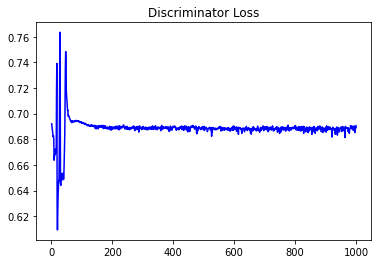

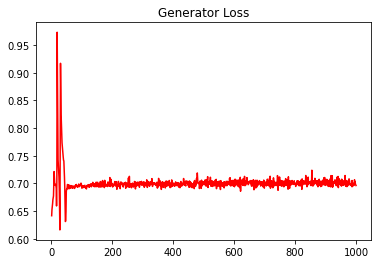

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.11619826268210473


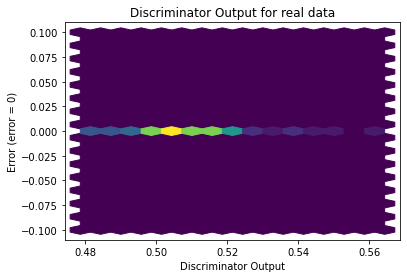

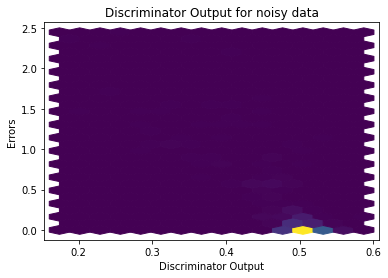

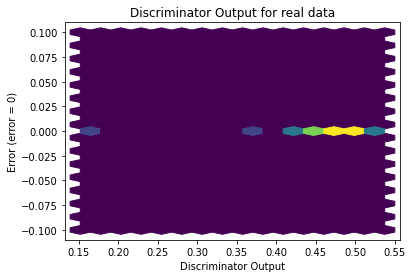

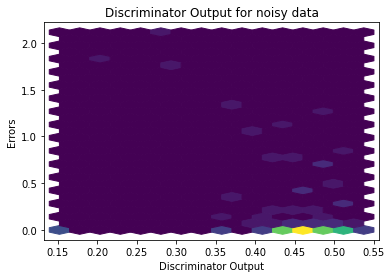

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


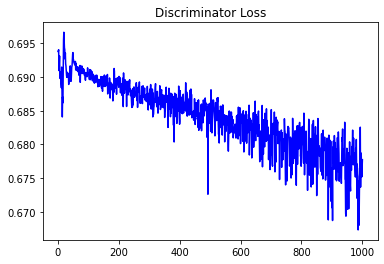

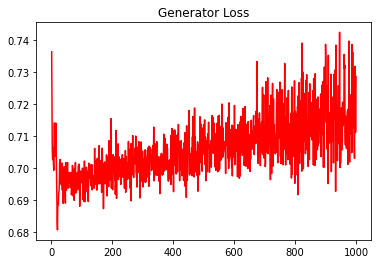

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.13067395308783755


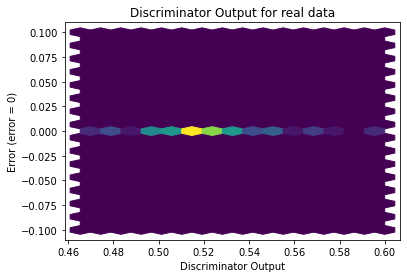

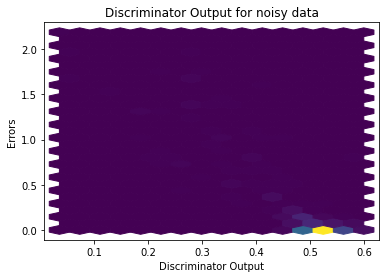

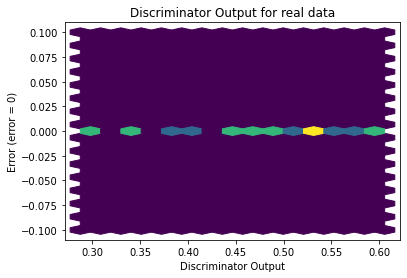

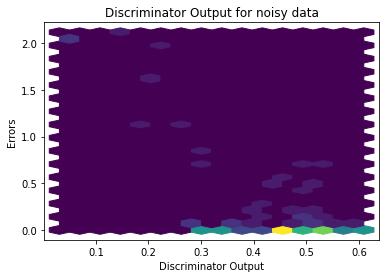

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1557]], requires_grad=True)
